# CIS 9650 - Group 11 Final Project
## Group Members: Ahmmed Hossain, Hadrian Balaban, Ellis Hamabuchi

# Setup

In [1]:
try:
    import yfinance as yf
except:
    print("Installation unsuccessful")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

# Functions

In [2]:
def createDf(ticker):
    data = yf.download(ticker, start = '2019-01-01', end = '2019-12-31')
    data = data.drop(columns = ["Open", "High", "Low", "Close", "Volume"])
    #print(data.head(5))
    data["Daily % Change"] = data["Adj Close"].pct_change(periods = 1)
    data = data.dropna()
    return data

In [3]:
def basicsAndBar(ticker, data):
    
    print(data.head(5))
    print(ticker,"Count:\n", data.count())
    print("\n")
    print(ticker,'% Change Stats: ')
    print("Mean:\n", data.mean())
    print("\n")
    print("Standard Deviation:\n", data.std())
    print("\n")
    print("Variance:\n", data.var())
    print("\n")    
    print("Min:\n", data.min())
    print("\n")
    print("Max:\n", data.max())
    
    dataDaily = data["Daily % Change"]
    dataChart = dataDaily.plot.bar(color = ['#9fc5e8'])    
    dataChart.set_ylabel('Daily % Change')
    ticks_to_use = np.arange(0,len(data),20)
    labels = [data.index[i] for i in ticks_to_use]
    dataChart.set_xticks(ticks_to_use)
    dataChart.set_xticklabels(labels)
    
    #print(dataChart)
    
    #regression(data)

In [4]:
from sklearn.metrics import mean_squared_error
def regression(ticker):
    sp500 = yf.download("^GSPC", start = '2019-01-01', end = '2019-12-31')
    sp500 = sp500.drop(columns = ["Open", "High", "Low", "Close", "Volume"])
    sp500["Daily % Change"] = sp500["Adj Close"].pct_change(periods = 1)
    sp500 = sp500.dropna()
    tickerReg = linear_model.LinearRegression()
    tickerReg.fit(sp500[["Daily % Change"]],ticker[["Daily % Change"]])

    %matplotlib inline
    plt.xlabel('S&P 500', fontsize = 13)
    plt.ylabel('ticker', fontsize = 13)
    plt.scatter(sp500["Daily % Change"], ticker["Daily % Change"], color = 'red', marker = '+')
    plt.plot(sp500["Daily % Change"], tickerReg.predict(sp500[["Daily % Change"]]), 
             color = 'blue')
    
    tickerCoefficient = tickerReg.coef_
    tickerCoefficient = tickerCoefficient.flatten()
    tickerCoefficient = tickerCoefficient.flatten()
    tickerCoefficient = tickerCoefficient[0]
    
    tickerIntercept = tickerReg.intercept_
    tickerIntercept = tickerIntercept.flatten()
    tickerIntercept = tickerIntercept.flatten()
    tickerIntercept = tickerIntercept[0]

    newArray = []
    Y_true = ticker["Daily % Change"]
    
    for i in ticker['Daily % Change']:
        newArray.append(tickerCoefficient + i * tickerIntercept)

    Y_pred = newArray
    
    tickerMSE = mean_squared_error(Y_true,Y_pred)
    tickerR = tickerReg.score(sp500[["Daily % Change"]], ticker["Daily % Change"])

    print("Intercept:", tickerIntercept)
    print("Coefficient:", tickerCoefficient)
    print("R-squared:", tickerR)
    print("Mean squared error:", tickerMSE)


# S&P 500

[*********************100%***********************]  1 of 1 completed
              Adj Close  Daily % Change
Date                                   
2019-01-03  2447.889893       -0.024757
2019-01-04  2531.939941        0.034336
2019-01-07  2549.689941        0.007010
2019-01-08  2574.409912        0.009695
2019-01-09  2584.959961        0.004098
^GSPC Count:
 Adj Close         250
Daily % Change    250
dtype: int64


^GSPC % Change Stats: 
Mean:
 Adj Close         2913.699991
Daily % Change       0.001029
dtype: float64


Standard Deviation:
 Adj Close         147.733563
Daily % Change      0.007887
dtype: float64


Variance:
 Adj Close         21825.205706
Daily % Change        0.000062
dtype: float64


Min:
 Adj Close         2447.889893
Daily % Change      -0.029778
dtype: float64


Max:
 Adj Close         3240.020020
Daily % Change       0.034336
dtype: float64


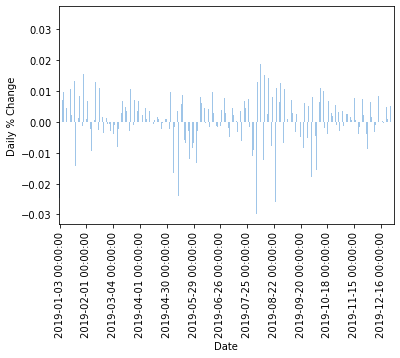

In [5]:
sp500 = createDf('^GSPC')
basicsAndBar('^GSPC', sp500)

# Stocks

## Tesla

[*********************100%***********************]  1 of 1 completed
            Adj Close  Daily % Change
Date                                 
2019-01-03  60.071999       -0.031472
2019-01-04  63.537998        0.057697
2019-01-07  66.991997        0.054361
2019-01-08  67.070000        0.001164
2019-01-09  67.706001        0.009483
TSLA Count:
 Adj Close         250
Daily % Change    250
dtype: int64


TSLA % Change Stats: 
Mean:
 Adj Close         54.560928
Daily % Change     0.001639
dtype: float64


Standard Deviation:
 Adj Close         10.477952
Daily % Change     0.030876
dtype: float64


Variance:
 Adj Close         109.787487
Daily % Change      0.000953
dtype: float64


Min:
 Adj Close         35.793999
Daily % Change    -0.136137
dtype: float64


Max:
 Adj Close         86.188004
Daily % Change     0.176692
dtype: float64


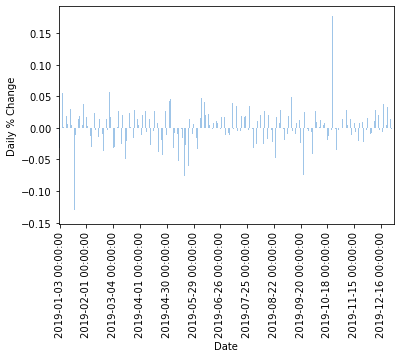

In [6]:
tesla = createDf('TSLA')
basicsAndBar("TSLA", tesla)

[*********************100%***********************]  1 of 1 completed
Intercept: 0.00028302575251429904
Coefficient: 1.3175284982964741
R-squared: 0.11327424610038139
Mean squared error: 1.7325142683436374


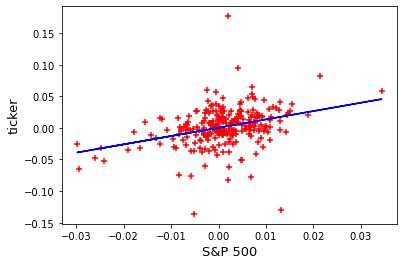

In [7]:
regression(tesla)

## Apple

[*********************100%***********************]  1 of 1 completed
            Adj Close  Daily % Change
Date                                 
2019-01-03  34.610851       -0.099607
2019-01-04  36.088364        0.042689
2019-01-07  36.008041       -0.002226
2019-01-08  36.694466        0.019063
2019-01-09  37.317600        0.016982
AAPL Count:
 Adj Close         250
Daily % Change    250
dtype: int64


AAPL % Change Stats: 
Mean:
 Adj Close         51.112783
Daily % Change     0.002652
dtype: float64


Standard Deviation:
 Adj Close         8.585734
Daily % Change    0.016529
dtype: float64


Variance:
 Adj Close         73.714836
Daily % Change     0.000273
dtype: float64


Min:
 Adj Close         34.610851
Daily % Change    -0.099607
dtype: float64


Max:
 Adj Close         72.025833
Daily % Change     0.068334
dtype: float64


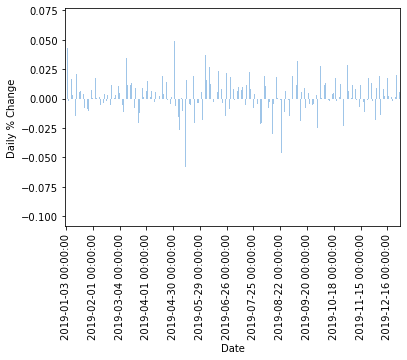

In [8]:
apple = createDf('AAPL')
basicsAndBar('AAPL', apple)

[*********************100%***********************]  1 of 1 completed
Intercept: 0.0010491793593634382
Coefficient: 1.5570204733521844
R-squared: 0.552023802052011
Mean squared error: 2.4163411571356805


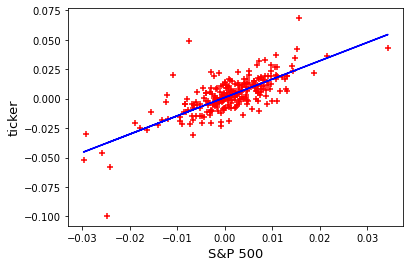

In [9]:
regression(apple)

## Tilray

[*********************100%***********************]  1 of 1 completed
            Adj Close  Daily % Change
Date                                 
2019-01-03  70.000000       -0.006529
2019-01-04  69.949997       -0.000714
2019-01-07  71.900002        0.027877
2019-01-08  83.260002        0.157997
2019-01-09  79.699997       -0.042758
TLRY Count:
 Adj Close         250
Daily % Change    250
dtype: int64


TLRY % Change Stats: 
Mean:
 Adj Close         44.929920
Daily % Change    -0.004999
dtype: float64


Standard Deviation:
 Adj Close         21.087258
Daily % Change     0.044603
dtype: float64


Variance:
 Adj Close         444.672449
Daily % Change      0.001989
dtype: float64


Min:
 Adj Close         15.720000
Daily % Change    -0.172441
dtype: float64


Max:
 Adj Close         100.150002
Daily % Change      0.194030
dtype: float64


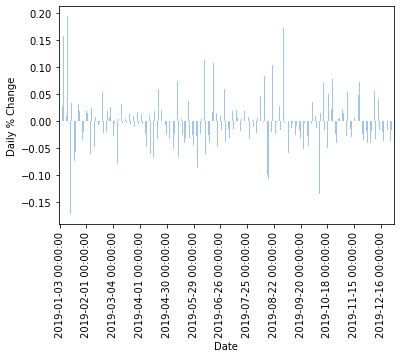

In [10]:
tilray = createDf('TLRY')
basicsAndBar('TLRY', tilray)

[*********************100%***********************]  1 of 1 completed
Intercept: -0.006150536807007767
Coefficient: 1.119005505498911
R-squared: 0.039154004162822886
Mean squared error: 1.2654601289075673


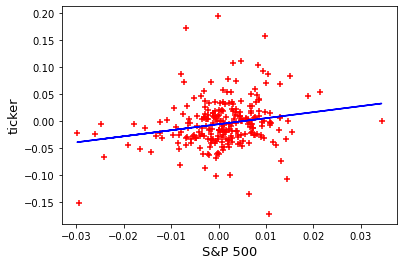

In [11]:
regression(tilray)

## Facebook

[*********************100%***********************]  1 of 1 completed
             Adj Close  Daily % Change
Date                                  
2019-01-03  131.740005       -0.029039
2019-01-04  137.949997        0.047138
2019-01-07  138.050003        0.000725
2019-01-08  142.529999        0.032452
2019-01-09  144.229996        0.011927
FB Count:
 Adj Close         250
Daily % Change    250
dtype: int64


FB % Change Stats: 
Mean:
 Adj Close         181.726880
Daily % Change      0.001792
dtype: float64


Standard Deviation:
 Adj Close         15.779834
Daily % Change     0.017505
dtype: float64


Variance:
 Adj Close         249.003172
Daily % Change      0.000306
dtype: float64


Min:
 Adj Close         131.740005
Daily % Change     -0.075055
dtype: float64


Max:
 Adj Close         208.100006
Daily % Change      0.108164
dtype: float64


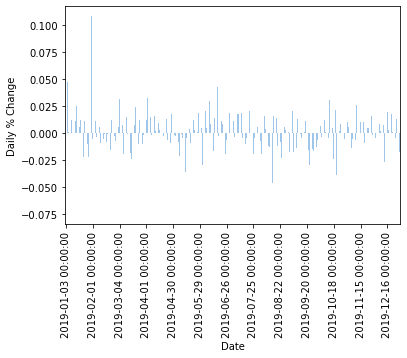

In [12]:
facebook = createDf('FB')
basicsAndBar('FB', facebook)

[*********************100%***********************]  1 of 1 completed
Intercept: 0.0004862881980924236
Coefficient: 1.2684005175643924
R-squared: 0.3266058229804718
Mean squared error: 1.604604005925427


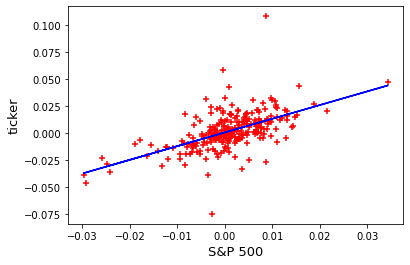

In [13]:
regression(facebook)

## Amazon

[*********************100%***********************]  1 of 1 completed
              Adj Close  Daily % Change
Date                                   
2019-01-03  1500.280029       -0.025242
2019-01-04  1575.390015        0.050064
2019-01-07  1629.510010        0.034353
2019-01-08  1656.579956        0.016612
2019-01-09  1659.420044        0.001714
AMZN Count:
 Adj Close         250
Daily % Change    250
dtype: int64


AMZN % Change Stats: 
Mean:
 Adj Close         1789.954840
Daily % Change       0.000833
dtype: float64


Standard Deviation:
 Adj Close         100.406050
Daily % Change      0.014411
dtype: float64


Variance:
 Adj Close         10081.374822
Daily % Change        0.000208
dtype: float64


Min:
 Adj Close         1500.280029
Daily % Change      -0.053819
dtype: float64


Max:
 Adj Close         2020.989990
Daily % Change       0.050064
dtype: float64


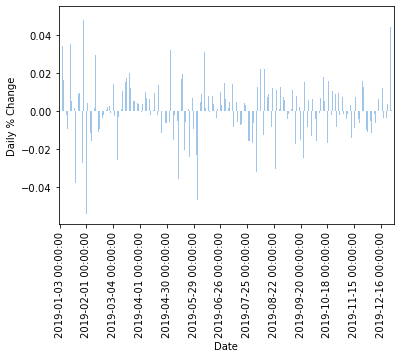

In [14]:
amazon = createDf("AMZN")
basicsAndBar("AMZN", amazon)

[*********************100%***********************]  1 of 1 completed
Intercept: -0.000533398590600958
Coefficient: 1.3271002879677256
R-squared: 0.5275887149176062
Mean squared error: 1.7591912113875852


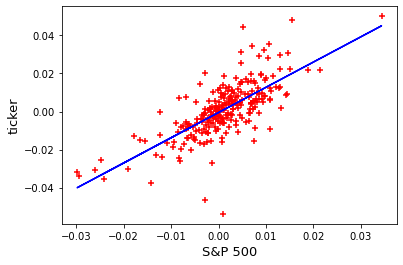

In [15]:
regression(amazon)

# Regression Analysis Results
Based on the R-squared values for each of these stocks, Apple is the most highly correlated with the S&P 500 with an R-squared of 0.552023802052011. Tilray was the least correlated with an R-squared of 0.039154004162822886.